# Scrutinize the data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Loading the dataset
penguins_size = pd.read_csv('Data Resources/penguins_size.csv', sep = ",")
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
import numpy as np
print(np.__version__)

1.16.5


In [3]:
print("Shape is: ", penguins_size.shape)

Shape is:  (344, 7)


In [4]:
# Visualize the data types using the features info() function

penguins_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

# Data Cleaning 

In [5]:
penguins_size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
penguins_size["culmen_length_mm"] = penguins_size["culmen_length_mm"].fillna(value = penguins_size["culmen_length_mm"].mean())
penguins_size["culmen_depth_mm"] = penguins_size["culmen_depth_mm"].fillna(value = penguins_size["culmen_depth_mm"].mean())
penguins_size["flipper_length_mm"] = penguins_size["flipper_length_mm"].fillna(value = penguins_size["flipper_length_mm"].mean())
penguins_size["body_mass_g"] = penguins_size["body_mass_g"].fillna(value = penguins_size["body_mass_g"].mean())

In [7]:
# Imputing the missing values with the mean of the corresponding features 
penguins_size["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
# Substituting the NaN values using the 'Male'
penguins_size['sex'] = penguins_size['sex'].fillna('MALE')

In [9]:
# Dropping all NaN Values in the Penguins Data Frame 
penguins_size.drop(axis = 0, inplace = True, index = 336)
penguins_size = penguins_size.dropna(axis = 0, how ='any') 
penguins_size.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
# Checking if there is any duplicate rows 
duplicated = penguins_size.duplicated()
print(duplicated.sum())


0


In [11]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
species              343 non-null object
island               343 non-null object
culmen_length_mm     343 non-null float64
culmen_depth_mm      343 non-null float64
flipper_length_mm    343 non-null float64
body_mass_g          343 non-null float64
sex                  343 non-null object
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# Statistical Insights

In [12]:
# Providing a statistical analysis on the Penguins DF
penguins_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.920244,17.155400,200.868310,4199.791571
std,5.451506,1.970337,14.014098,799.950869
min,32.100000,13.100000,172.000000,2700.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
penguins_size['species'].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [14]:
# Find body mass mean for each species.
mean_bodymass = penguins_size.groupby('species')['body_mass_g'].mean()
mean_bodymass

species
Adelie       3703.958910
Chinstrap    3733.088235
Gentoo       5070.542719
Name: body_mass_g, dtype: float64

## Categorization of the dataset 

In [24]:
categorical_features = [col for col in penguins_size.columns if penguins_size[col].dtype=='O']
numerical_features = [col for col in penguins_size.columns if penguins_size[col].dtype!='O']
print("These are the categorical features:",categorical_features)
print()
print("These are the Numerical features:",numerical_features)

These are the categorical features: ['species', 'island', 'sex']

These are the Numerical features: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [25]:
penguins_size['species'].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [26]:
# Find body mass mean by species.
mean_bodymass = penguins_size.groupby('species')['body_mass_g'].mean()
mean_bodymass

species
Adelie       3703.958910
Chinstrap    3733.088235
Gentoo       5070.542719
Name: body_mass_g, dtype: float64

In [27]:
# Find culmen_length_mm mean by species.
mean_culmen_length_mm = penguins_size.groupby('species')['culmen_length_mm'].mean()
mean_culmen_length_mm

species
Adelie       38.825144
Chinstrap    48.833824
Gentoo       47.500178
Name: culmen_length_mm, dtype: float64

In [28]:
# Find flipper_length_mm mean by species.
mean_flipper_length_mm = penguins_size.groupby('species')['flipper_length_mm'].mean()
mean_flipper_length_mm

species
Adelie       190.025758
Chinstrap    195.823529
Gentoo       217.056221
Name: flipper_length_mm, dtype: float64

In [29]:
# Find culmen_depth_mm mean by species.
mean_culmen_depth_mm = penguins_size.groupby('species')['culmen_depth_mm'].mean()
mean_culmen_depth_mm

species
Adelie       18.338495
Chinstrap    18.420588
Gentoo       14.993912
Name: culmen_depth_mm, dtype: float64

# Data Visualization

## Boxplot

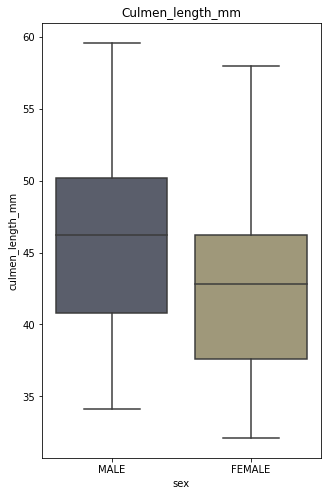

In [15]:
#Relationship of the culmen length and sex of the penguins.

fig = plt.figure(figsize=(5,8))
ax= sns.boxplot(x = penguins_size.sex, y=penguins_size['culmen_length_mm'],orient="v", palette = "cividis")
plt.title('Culmen_length_mm')
plt.show()

## Histogram

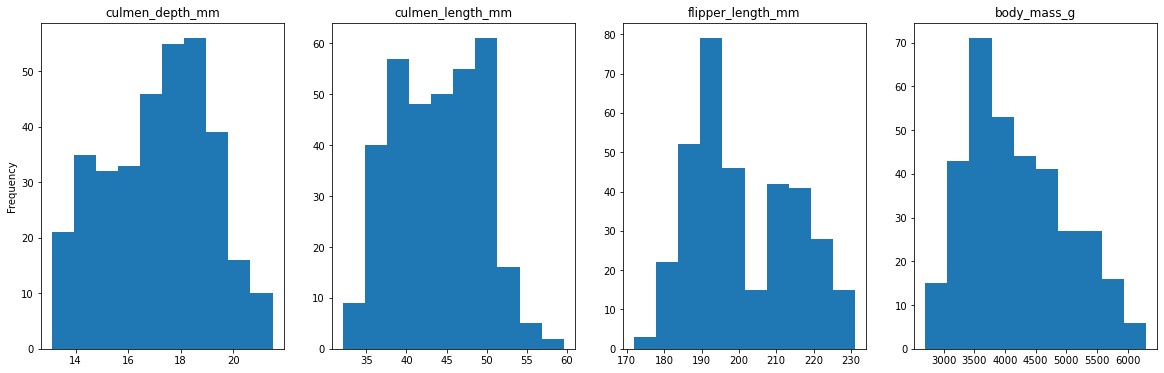

In [16]:
#Shows us frequency distribution.

fig,axs = plt.subplots(1,4,figsize=(20,6))
axs[0].hist(penguins_size.culmen_depth_mm)
axs[0].set_title('culmen_depth_mm')
axs[0].set_ylabel('Frequency')
axs[1].hist(penguins_size.culmen_length_mm)
axs[1].set_title('culmen_length_mm')
axs[2].hist(penguins_size.flipper_length_mm)
axs[2].set_title('flipper_length_mm')
axs[3].hist(penguins_size.body_mass_g)
axs[3].set_title('body_mass_g')
plt.show()


## Kdeplot

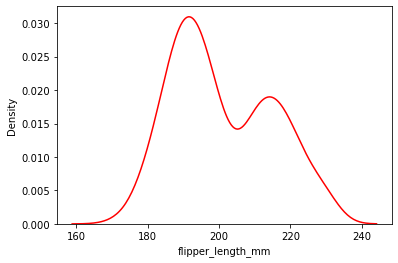

In [17]:
#Used for visualizing the probability density of a continuous var.

sns.kdeplot(penguins_size.flipper_length_mm,color='red')
plt.show()

# Bar Plot

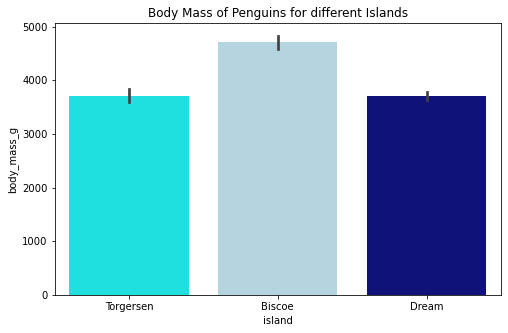

In [18]:
# Bar Plot

plt.figure(figsize=(8,5))
colors = ["cyan","lightblue", "darkblue"]
sns.barplot(x =penguins_size['island'],
y = penguins_size['body_mass_g'], palette = colors)
plt.title('Body Mass of Penguins for different Islands')
plt.show()


# Crosstab

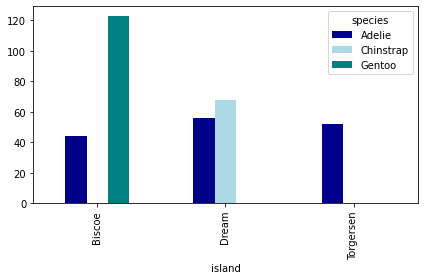

In [19]:
# Using Crosstab
pd.crosstab(penguins_size['island'], penguins_size['species']).plot.bar(color=('DarkBlue', 'LightBlue', 'Teal'))
plt.tight_layout()

# Count Plot

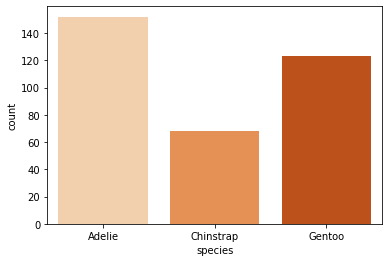

In [20]:
# Count Plot
sns.countplot('species', data=penguins_size, palette ="Oranges")
plt.show()

# Violin Plot 

Text(0.5, 1.0, 'Violin Plot')

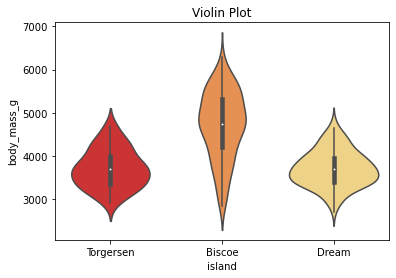

In [21]:
# Using the Violin Plot 
sns.violinplot(x = 'island', y = 'body_mass_g', data = penguins_size, palette='YlOrRd_r')
plt.title("Violin Plot")

# Correlation Matrix

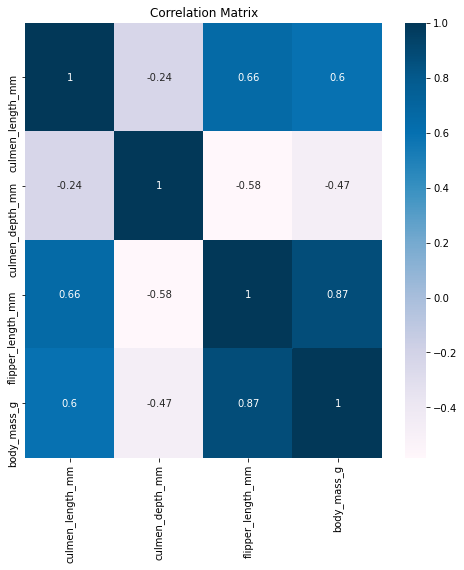

In [22]:
# Correlation Matrix
corr = penguins_size.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = True, cmap = "PuBu")
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

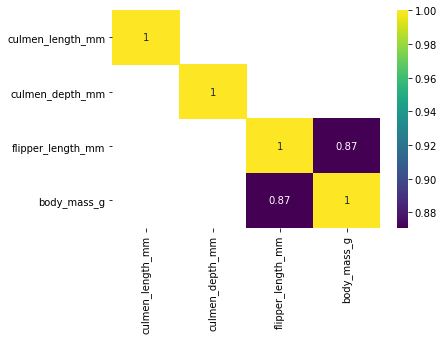

In [23]:
sns.heatmap(corr[(corr > 0.8)],annot = True, cmap="viridis")